In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from pathlib import Path

# from pptoolbox.visualization import initialize_theme
# cmaps = initialize_theme()

# import

In [2]:
datafolder = Path("../data/processed/")
# X_all = pd.read_csv(datafolder / "X_all.csv")
y_all = pd.read_csv(datafolder / "y_all.csv", index_col=0)

In [3]:
y_all

,lot_name,specimen_id,date_scanned,analyzer_id,Appearance,Broken rice,Broken rice during soaking,Damaged rice,Milling yield,Off flavor,Overall taste,Texture,Total yield,White rice yield,Whiteness
lot_id,,,,,,,,,,,,,,,
106229,BR2,626933,2025-07-28,105,-2.17,0.92,3.00,0.21,83.88,-0.58,-0.67,-0.92,83.69,85.01,43.0
106229,BR2,626934,2025-07-28,105,-2.17,0.92,3.00,0.21,83.88,-0.58,-0.67,-0.92,83.69,85.01,43.0
106229,BR2,626936,2025-07-28,105,-2.17,0.92,3.00,0.21,83.88,-0.58,-0.67,-0.92,83.69,85.01,43.0
106229,BR2,626937,2025-07-28,105,-2.17,0.92,3.00,0.21,83.88,-0.58,-0.67,-0.92,83.69,85.01,43.0
106229,BR2,626938,2025-07-28,105,-2.17,0.92,3.00,0.21,83.88,-0.58,-0.67,-0.92,83.69,85.01,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106623,BR206,630933,2025-08-05,105,-1.83,3.27,2.75,1.10,84.16,-1.25,0.50,-1.58,84.03,88.55,41.5
106623,BR206,630934,2025-08-05,105,-1.83,3.27,2.75,1.10,84.16,-1.25,0.50,-1.58,84.03,88.55,41.5
106623,BR206,630935,2025-08-05,105,-1.83,3.27,2.75,1.10,84.16,-1.25,0.50,-1.58,84.03,88.55,41.5


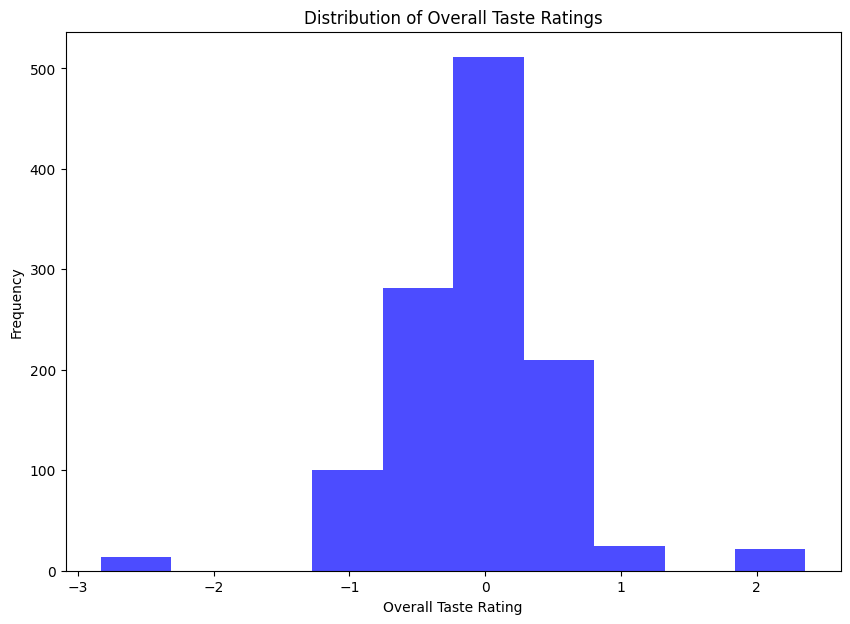

In [4]:
pd.cut(y_all['Overall taste'],5)

# plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.hist(y_all['Overall taste'], bins=10, alpha=0.7, color='blue')
plt.title('Distribution of Overall Taste Ratings')
plt.xlabel('Overall Taste Rating')
plt.ylabel('Frequency')
plt.show()

# calculate correlation

In [5]:
yield_df = y_all[['Milling yield','Total yield','White rice yield']].reset_index().drop_duplicates(subset='lot_id').set_index('lot_id')
yield_df

,Milling yield,Total yield,White rice yield
lot_id,,,
106229,83.88,83.69,85.01
106230,86.06,85.37,88.08
106231,85.76,85.47,86.65
106232,84.09,83.86,85.33
106233,86.81,86.71,87.73
...,...,...,...
106619,87.76,87.50,88.73
106620,82.79,82.54,83.81
106621,81.65,81.32,83.34


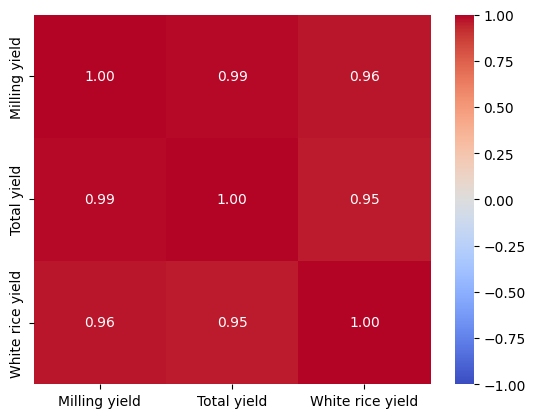

In [6]:
# calculate correlation
correlation_matrix = yield_df.corr(method='pearson')

plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            vmin=-1, vmax=1, fmt=".2f",)

plt.show()

In [7]:
physical_df = y_all[['Broken rice', 'Broken rice during soaking', 'Damaged rice']].reset_index().drop_duplicates(subset='lot_id').set_index('lot_id')
physical_df

,Broken rice,Broken rice during soaking,Damaged rice
lot_id,,,
106229,0.92,3.00,0.21
106230,1.78,2.75,0.23
106231,0.59,3.10,0.30
106232,1.02,2.70,0.23
106233,0.36,2.55,0.55
...,...,...,...
106619,0.80,2.60,0.16
106620,0.98,2.80,0.03
106621,1.26,2.90,0.43


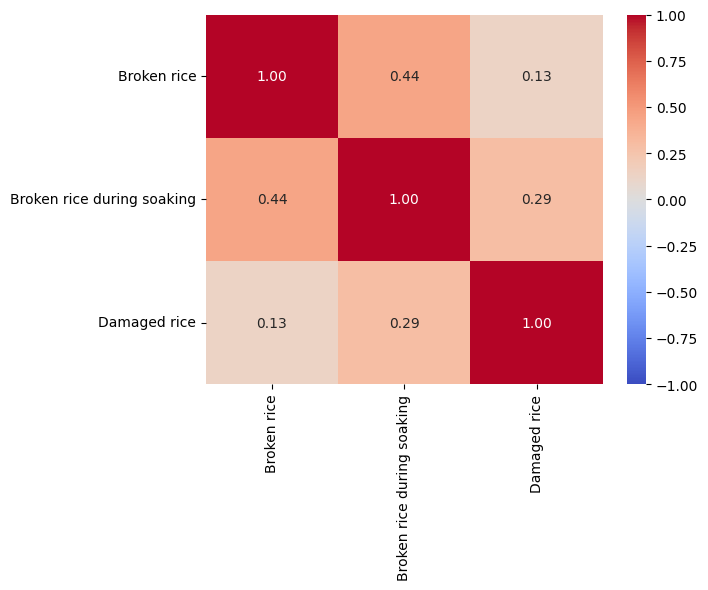

In [8]:
# calculate correlation
correlation_matrix = physical_df.corr(method='pearson')

plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            vmin=-1, vmax=1, fmt=".2f",)

plt.show()

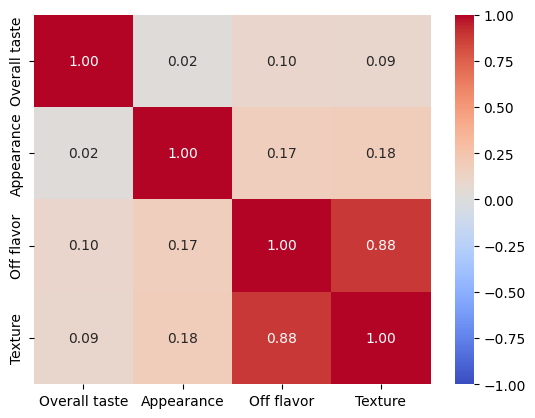

In [9]:
sensory_df = y_all[['Overall taste', 'Appearance', 'Off flavor', 'Texture']].reset_index().drop_duplicates(subset='lot_id').set_index('lot_id')
# calculate correlation
correlation_matrix = sensory_df.corr(method='pearson')

plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            vmin=-1, vmax=1, fmt=".2f",)

plt.show()

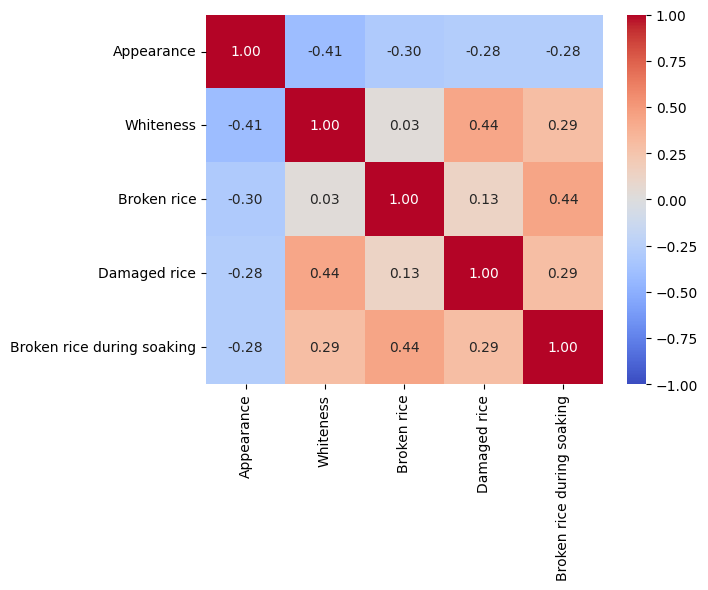

In [10]:
sensory_df = y_all[['Appearance', 'Whiteness', 'Broken rice', 'Damaged rice', 'Broken rice during soaking']].reset_index().drop_duplicates(subset='lot_id').set_index('lot_id')
# calculate correlation
correlation_matrix = sensory_df.corr(method='pearson')

plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            vmin=-1, vmax=1, fmt=".2f",)

plt.show()

# plot data

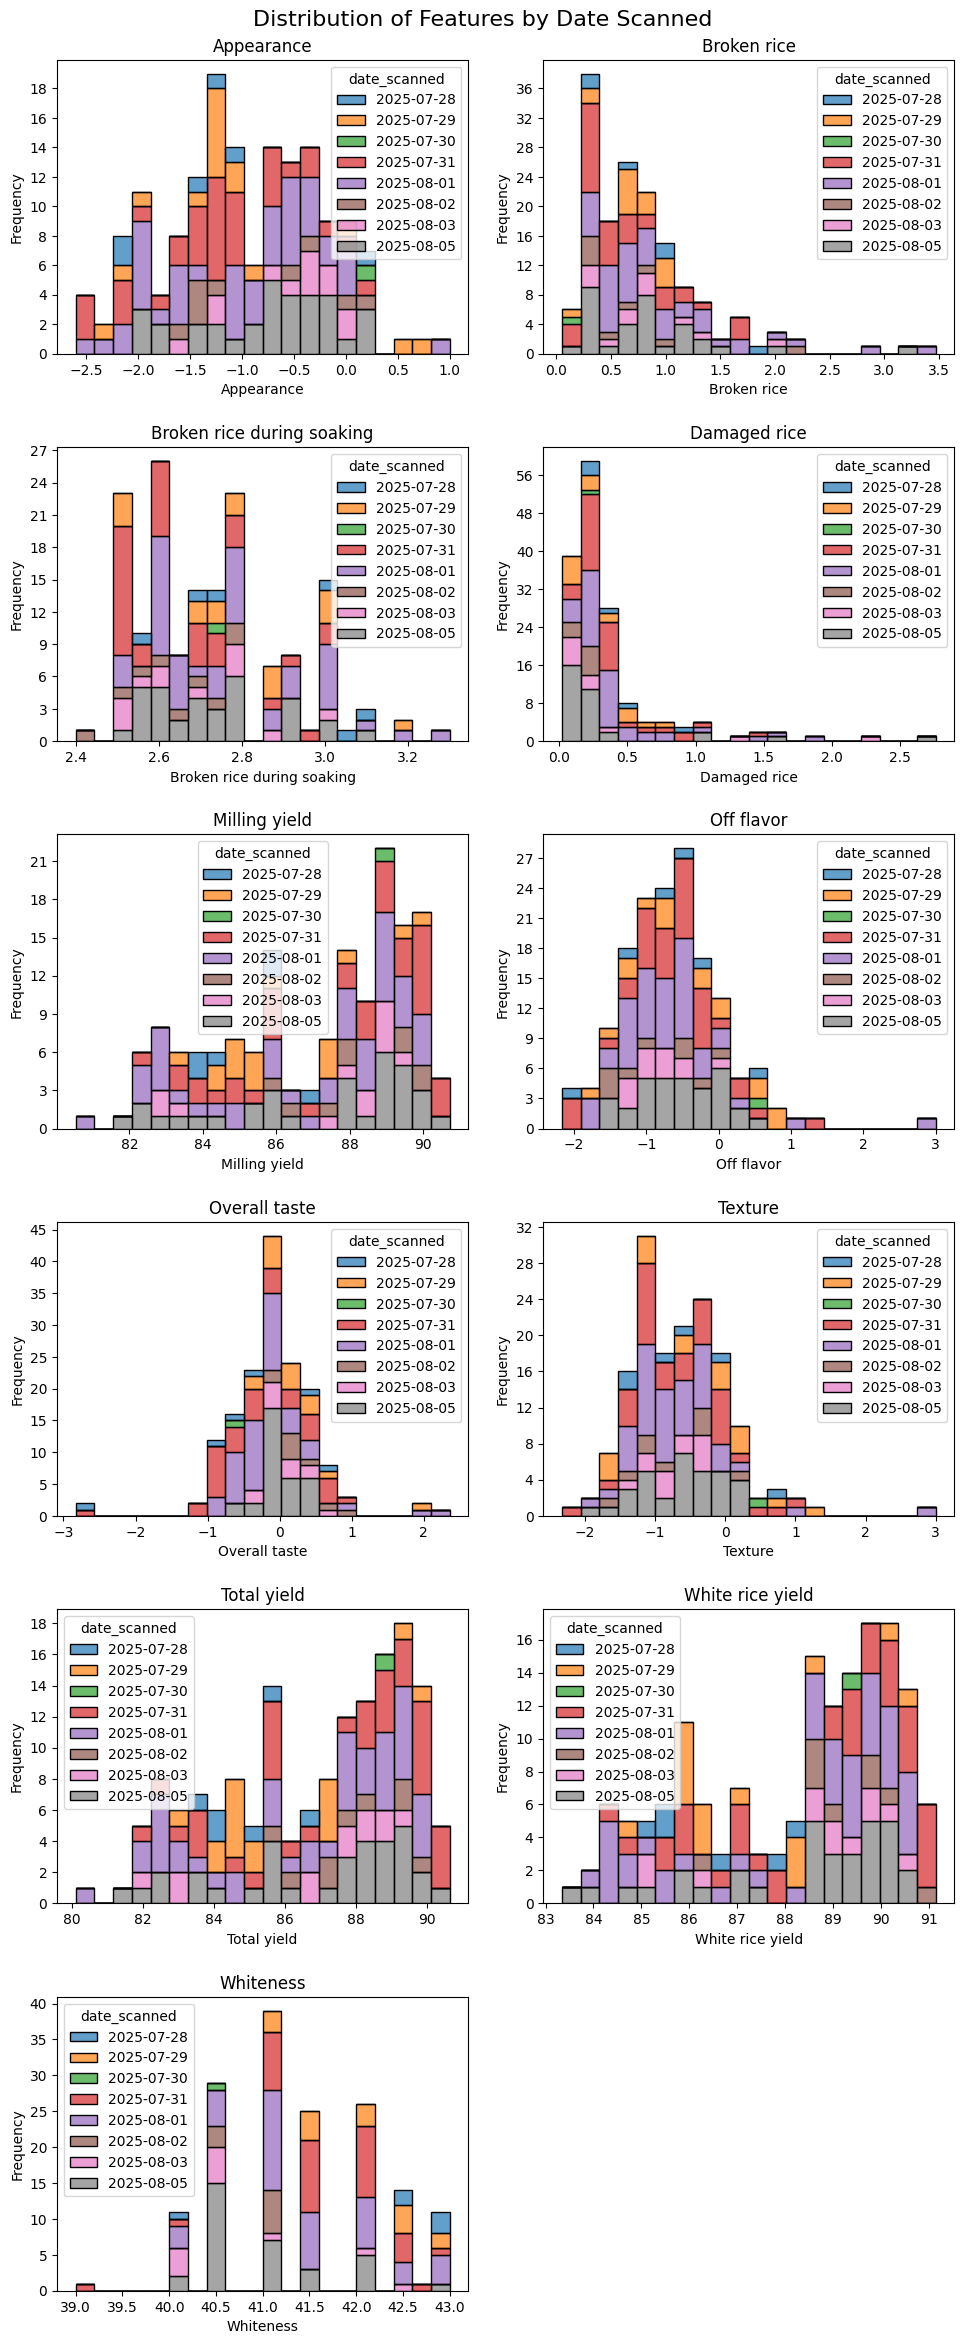

In [14]:
# plot histogram of y_all except for 'lot_name', 'specimen_id' colored by date_scanned
selected_columns = y_all.columns.difference(['lot_name', 'specimen_id', 'date_scanned','split','analyzer_id'])

#determine number of subplots needed
num_subplots = len(selected_columns)
num_cols = 2
num_rows = np.ceil(num_subplots / num_cols).astype(int)  # Calculate number of rows needed
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 4*num_rows))
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(selected_columns):
    sns.histplot(data=y_all.drop_duplicates(subset=['lot_name']), x=col, hue='date_scanned', multiple='stack', ax=axs[i], bins=20, alpha=0.7)
    axs[i].set_title(f'{col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].yaxis.set_major_locator(MaxNLocator(integer=True))

# Hide any unused subplots
for i in range(num_subplots, len(axs)):
    axs[i].set_visible(False)

# Adjust spacing between subplots to prevent overlapping
plt.suptitle('Distribution of Features by Date Scanned', fontsize=16)
plt.tight_layout(pad=2.0)
plt.show()

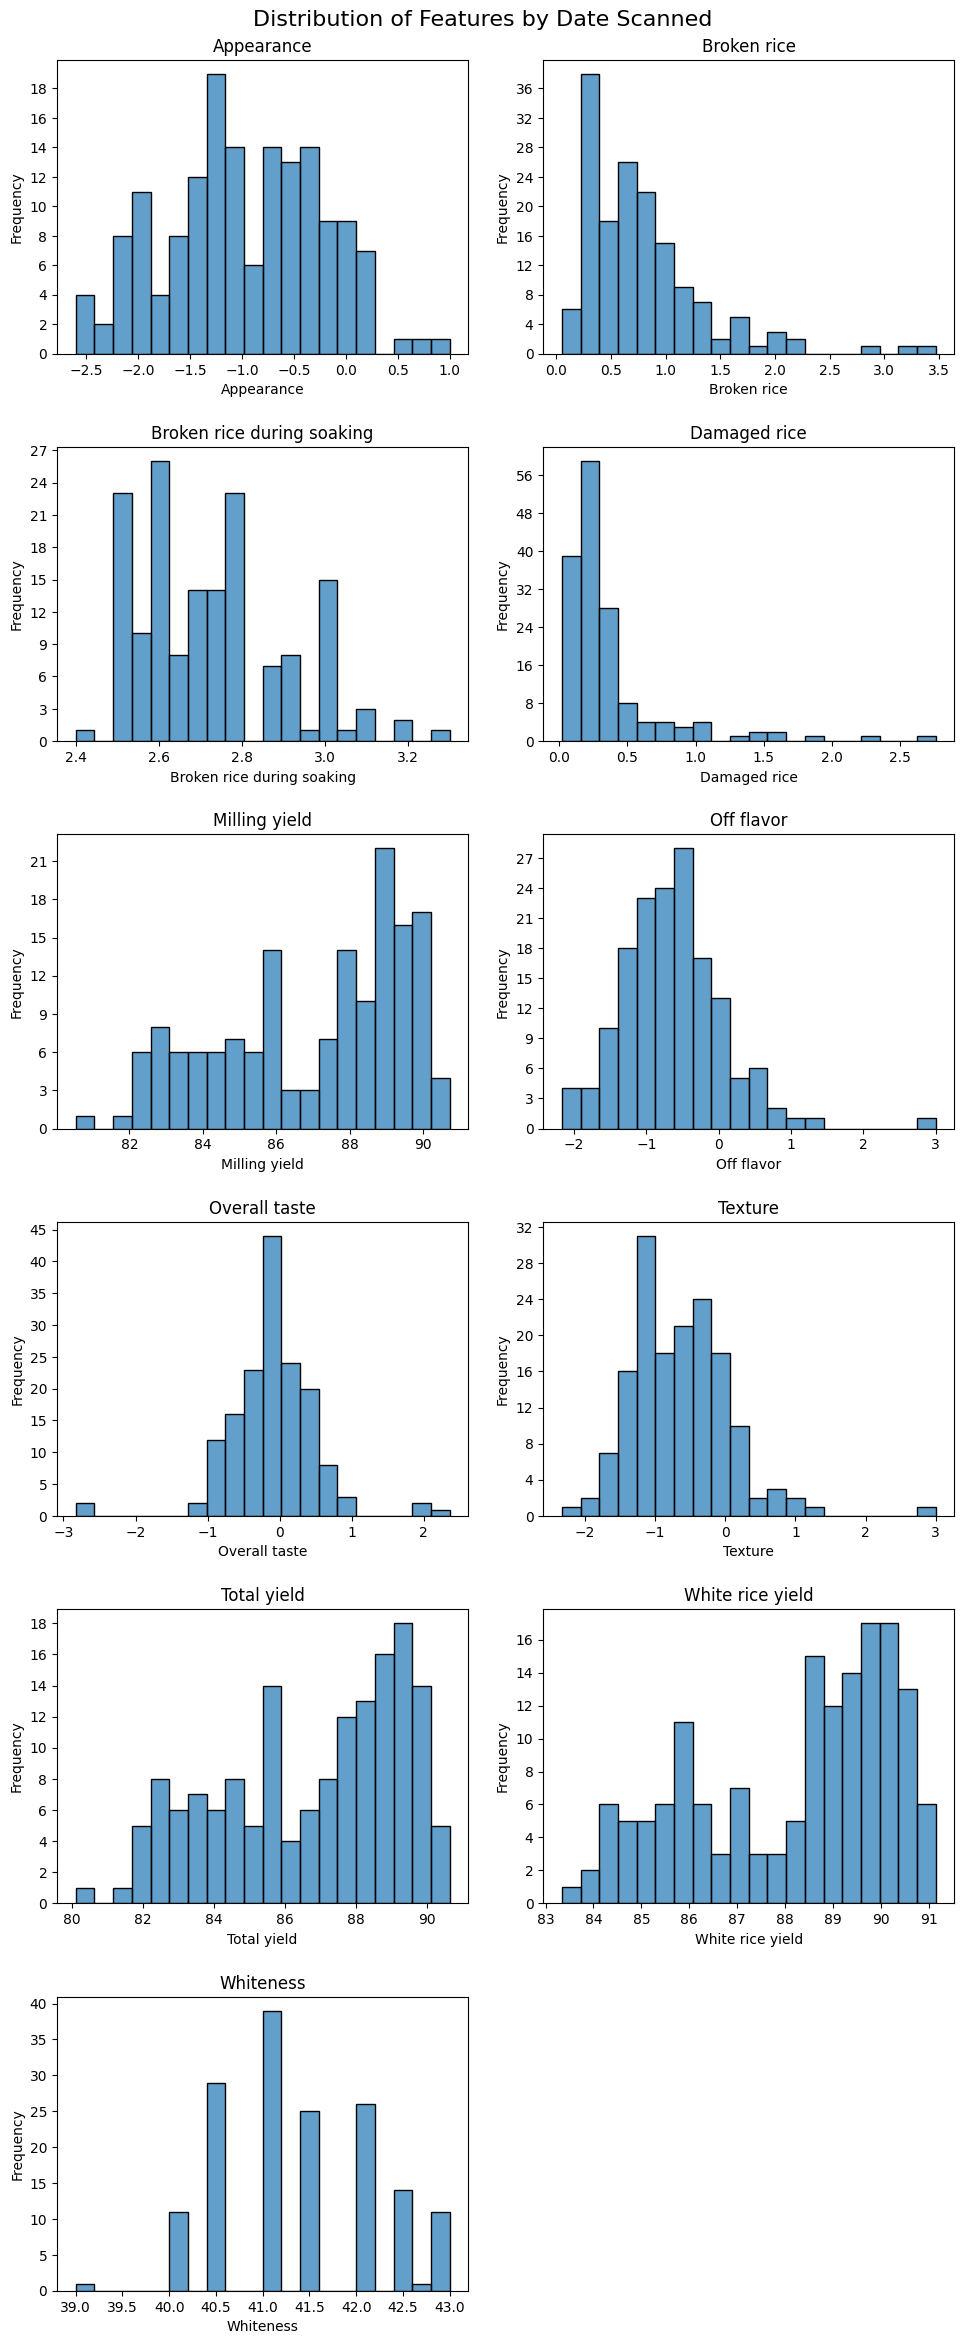

In [13]:
# plot histogram of y_all except for 'lot_name', 'specimen_id' colored by date_scanned
selected_columns = y_all.columns.difference(['lot_name', 'specimen_id', 'date_scanned','split','analyzer_id'])

#determine number of subplots needed
num_subplots = len(selected_columns)
num_cols = 2
num_rows = np.ceil(num_subplots / num_cols).astype(int)  # Calculate number of rows needed
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 4*num_rows))
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(selected_columns):
    sns.histplot(data=y_all.drop_duplicates(subset=['lot_name']), x=col, ax=axs[i], bins=20, alpha=0.7)
    axs[i].set_title(f'{col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].yaxis.set_major_locator(MaxNLocator(integer=True))

# Hide any unused subplots
for i in range(num_subplots, len(axs)):
    axs[i].set_visible(False)

# Adjust spacing between subplots to prevent overlapping
plt.suptitle('Distribution of Features by Date Scanned', fontsize=16)
plt.tight_layout(pad=2.0)
plt.show()